<a href="https://colab.research.google.com/gist/qbeer/370770dacb737a35fb06725b69a13c05/02_blank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised learning & clustering
----
### 1. Reading data
The worldbank_jobs_2016.tsv (can be found in the same folder with this notebook) file contains the Jobs (and other) data for the 2016 year, downloaded from The World Bank's webpage.

- Look at the data in any text editor. Build up an overall sense how the data is built up and how the missing values are represented.
- Read the file into a pandas dataframe and tell pandas the delimiter (or separator) that separates the columns and which special pattern means if a value is missing.
- Keep only those rows, which represents countries, at the end there are some useless rows (with missing country code).
- The data is in a long format. Convert it into a wide format, where each row is a single country (with country code) and the column names are the features i.e. the Series Codes, the values in the columns are the measured values of the 2016 [YR 2016 column]. (eg the first column is 'EG.CFT.ACCS.ZS', the second is 'EG.ELC.ACCS.ZS'. Order of the columns does not matter)! Try to use the pivot method.
- Check that the features are in numeric format (dtypes), this will be needed for modeling!
-----
### 2. Data preprocessing and inspection
- Visualize the missing values!
- Keep only those countries which has less than 60 missing features in the original table.
- After this drop all features which have missing values for the remaining countries. (Imputation would also work but may introduce a bias because there is less data for less developed countries generally.)
- How many counties and features do we have left?
- Read the kept features' descriptions. In the original table the Series Name describe the meaning of the features. What do you think, based only on these information, which counties are the most similar to Hungary? And Greece?
------
### 3. PCA
- Perform PCA with 3 principal components on the filtered, imputed data (from now on, data refers to the filtered, imputed dataset)
- Plot the three embedded 2D combination next to each other (0 vs 1, 0 vs 2 and 1 vs 2)
- It seems that the embedding is really dominated by a single direction. Normalize the data (each feature should have zero mean and unit variance after normalization) and re-do the PCA and the plotting (do not delete the previous plots, just make new ones).
- Give some explaination for the second principal component: Look at the coefficients of the features which were use the calculate that principal component. For the features with the largest coefficient (in absolute value) look up the Series Name for the Code.
-----
### 4. T-SNE
- Perform T-SNE on the scaled data with 2 components
- Plot the embeddings results. Add a text label for each point to make it possible to interpret the results. It will not be possible to read all, but try to make it useful, see the attached image as an example!
- Highlight Hungary, Greece, Norway, China, Russia (HUN, GRC, NOR, CHN, RUS)! Which countries are the closest one to Hungary and Greece?
-------
### 5. Hierarchical and K-Means clustering
- Perform hierarchical clustering on the filtered and scaled data (hint: use seaborn)
- Try to plot in a way that all country's name is visible
- Perform K-Means clustering on the filtered and scaled data with 4 clusters.
- Make a plot with text label for each point as in the previous excersice but use different color for every cluster.
- Write down your impressions that you got from these two plots! Which cluster are China and Hungary in?
----
### Hints:
- On total you can get 10 points for fully completing all tasks.
- Decorate your notebook with questions, explanation etc, make it self contained and understandable!
- Comment your code when necessary!
- Write functions for repetitive tasks!
- Use the pandas package for data loading and handling
- Use matplotlib and seaborn for plotting or bokeh and plotly for interactive investigation
- Use the scikit learn package for almost everything
- Use for loops only if it is really necessary!
- Code sharing is not allowed between students! Sharing code will result in zero points.
- If you use code found on web, it is OK, but, make its source clear!

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sklearn as sk
from scipy.stats import pearsonr
import seaborn as sns

## Task 1
--------------------
### 1. Reading data
The worldbank_jobs_2016.tsv (can be found in the same folder with this notebook) file contains the Jobs (and other) data for the 2016 year, downloaded from The World Bank's webpage.

- Look at the data in any text editor. Build up an overall sense how the data is built up and how the missing values are represented.
- Read the file into a pandas dataframe and tell pandas the delimiter (or separator) that separates the columns and which special pattern means if a value is missing.
- Keep only those rows, which represents countries, at the end there are some useless rows (with missing country code).
- The data is in a long format. Convert it into a wide format, where each row is a single country (with country code) and the column names are the features i.e. the Series Codes, the values in the columns are the measured values of the 2016 [YR 2016 column]. (eg the first column is 'EG.CFT.ACCS.ZS', the second is 'EG.ELC.ACCS.ZS'. Order of the columns does not matter)! Try to use the pivot method.
- Check that the features are in numeric format (dtypes), this will be needed for modeling!
--------------------

In [97]:
#load the data sets
#the url to dataset
url='https://gist.githubusercontent.com/qbeer/2b3e272c59c104dd7a51df4f1d77e9e1/raw/9709160288a5663e7c0ebf0383feec7043562faa/02_dataset_worldbank_jobs_2016.tsv'
#load data frame
df=pd.read_csv(url, 
               sep='\t', #delimiter for .tsv files
               header=0, #first line is the header
               na_values=['..']) #missing values are marked with '..'
df.head(10)

,Country Name,Country Code,Series Name,Series Code,2016 [YR2016]
0,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,8.413714e+01
1,Afghanistan,AFG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,6.879420e+01
2,Afghanistan,AFG,Age dependency ratio (% of working-age populat...,SP.POP.DPND,8.657093e+01
3,Afghanistan,AFG,"Agriculture, value added (% of GDP)",NV.AGR.TOTL.ZS,2.096590e+01
4,Afghanistan,AFG,"Agriculture, value added (annual % growth)",NV.AGR.TOTL.KD.ZG,5.971751e+00
5,Afghanistan,AFG,"Agriculture, value added (constant 2005 US$)",NV.AGR.TOTL.KD,4.535103e+09
6,Afghanistan,AFG,"Air transport, registered carrier departures w...",IS.AIR.DPRT,2.277000e+04
7,Afghanistan,AFG,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,1.074215e+00
8,Afghanistan,AFG,"Borrowers from commercial banks (per 1,000 adu...",FB.CBK.BRWR.P3,3.051954e+00
9,Afghanistan,AFG,Consumer price index (2010 = 100),FP.CPI.TOTL,1.379046e+02


In [98]:
df.tail(10)#last rows

,Country Name,Country Code,Series Name,Series Code,2016 [YR2016]
36017,Zimbabwe,ZWE,"Vulnerable employment, male (% of male employm...",SL.EMP.VULN.MA.ZS,54.767000
36018,Zimbabwe,ZWE,"Vulnerable employment, total (% of total emplo...",SL.EMP.VULN.ZS,65.225000
36019,Zimbabwe,ZWE,"Wage and salaried workers, female (% of female...",SL.EMP.WORK.FE.ZS,23.323000
36020,Zimbabwe,ZWE,"Wage and salaried workers, male (% of male emp...",SL.EMP.WORK.MA.ZS,44.400002
36021,Zimbabwe,ZWE,"Wage and salaried workers, total (% of total e...",SL.EMP.WORK.ZS,34.112999
36022,NaN,NaN,NaN,NaN,NaN
36023,NaN,NaN,NaN,NaN,NaN
36024,NaN,NaN,NaN,NaN,NaN
36025,Data from database: Jobs,NaN,NaN,NaN,NaN
36026,Last Updated: 02/17/2021,NaN,NaN,NaN,NaN


In [99]:
pd.unique(df['Country Name'].values)

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faroe Is

In [100]:
last=np.max(np.where(df['Country Name']=='Zimbabwe'))
df=pd.DataFrame(df.drop(index=df.index[df.index>last]))

In [101]:
display(df.head(10))
display(df.tail(10))

,Country Name,Country Code,Series Name,Series Code,2016 [YR2016]
0,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,8.413714e+01
1,Afghanistan,AFG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,6.879420e+01
2,Afghanistan,AFG,Age dependency ratio (% of working-age populat...,SP.POP.DPND,8.657093e+01
3,Afghanistan,AFG,"Agriculture, value added (% of GDP)",NV.AGR.TOTL.ZS,2.096590e+01
4,Afghanistan,AFG,"Agriculture, value added (annual % growth)",NV.AGR.TOTL.KD.ZG,5.971751e+00
5,Afghanistan,AFG,"Agriculture, value added (constant 2005 US$)",NV.AGR.TOTL.KD,4.535103e+09
6,Afghanistan,AFG,"Air transport, registered carrier departures w...",IS.AIR.DPRT,2.277000e+04
7,Afghanistan,AFG,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,1.074215e+00
8,Afghanistan,AFG,"Borrowers from commercial banks (per 1,000 adu...",FB.CBK.BRWR.P3,3.051954e+00
9,Afghanistan,AFG,Consumer price index (2010 = 100),FP.CPI.TOTL,1.379046e+02


,Country Name,Country Code,Series Name,Series Code,2016 [YR2016]
36012,Zimbabwe,ZWE,"Unemployment, youth male (% of male labor forc...",SL.UEM.1524.MA.ZS,7.034000e+00
36013,Zimbabwe,ZWE,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,8.185000e+00
36014,Zimbabwe,ZWE,Urban population,SP.URB.TOTL,5.215921e+06
36015,Zimbabwe,ZWE,Urban population (% of total),SP.URB.TOTL.IN.ZS,3.229600e+01
36016,Zimbabwe,ZWE,"Vulnerable employment, female (% of female emp...",SL.EMP.VULN.FE.ZS,7.619400e+01
36017,Zimbabwe,ZWE,"Vulnerable employment, male (% of male employm...",SL.EMP.VULN.MA.ZS,5.476700e+01
36018,Zimbabwe,ZWE,"Vulnerable employment, total (% of total emplo...",SL.EMP.VULN.ZS,6.522500e+01
36019,Zimbabwe,ZWE,"Wage and salaried workers, female (% of female...",SL.EMP.WORK.FE.ZS,2.332300e+01
36020,Zimbabwe,ZWE,"Wage and salaried workers, male (% of male emp...",SL.EMP.WORK.MA.ZS,4.440000e+01
36021,Zimbabwe,ZWE,"Wage and salaried workers, total (% of total e...",SL.EMP.WORK.ZS,3.411300e+01


In [102]:
pivoted_df = df.pivot(index='Country Name', columns='Series Code', values='2016 [YR2016]')
display(pivoted_df.head(10))

Series Code,BM.KLT.DINV.WD.GD.ZS,BM.TRF.PWKR.CD.DT,BX.KLT.DINV.WD.GD.ZS,BX.TRF.PWKR.CD,CM.MKT.LCAP.GD.ZS,EG.ELC.ACCS.ZS,EG.USE.ELEC.KH.PC,EN.POP.DNST,FB.ATM.TOTL.P5,FB.CBK.BRWR.P3,...,SP.POP.TOTL,SP.RUR.TOTL,SP.RUR.TOTL.ZS,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,TM.VAL.ICTG.ZS.UN,TX.QTY.MRCH.XD.WD,TX.VAL.FUEL.ZS.UN,TX.VAL.MRCH.XD.WD,TX.VAL.TECH.MF.ZS
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,-0.075895,1.182164e+08,0.480710,2.774835e+08,NaN,84.137138,NaN,53.083405,1.074215,3.051954,...,34656032.0,25985093.0,74.980,8670939.0,25.020,0.262056,185.045514,NaN,434.379370,NaN
Albania,0.059209,1.471281e+08,8.786734,9.960014e+08,NaN,100.000000,NaN,104.967190,33.806812,157.797944,...,2876101.0,1195854.0,41.579,1680247.0,58.421,2.941437,556.660364,11.178982,750.385083,0.647751
Algeria,0.029423,5.897023e+07,1.029475,1.696801e+07,NaN,99.439568,NaN,17.048895,8.668604,39.065192,...,40606052.0,11589373.0,28.541,29016679.0,71.459,5.181022,144.936023,93.992128,131.099918,0.343524
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,277.995000,NaN,NaN,...,55599.0,7118.0,12.802,48481.0,87.198,NaN,44.999741,NaN,112.619116,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,164.427660,NaN,NaN,...,77281.0,9082.0,11.752,68199.0,88.248,NaN,149.884060,NaN,186.046284,NaN
Angola,2.882138,1.176110e+09,4.305164,3.988048e+06,NaN,40.520607,NaN,23.111786,NaN,18.158775,...,28813463.0,10329915.0,35.851,18483548.0,64.149,NaN,223.096447,NaN,344.731726,NaN
Antigua and Barbuda,0.445919,3.091604e+07,3.351529,2.740272e+07,NaN,97.354668,NaN,229.461364,65.350935,NaN,...,100963.0,75878.0,75.154,25085.0,24.846,3.141014,145.573063,0.000000,150.391738,NaN
Argentina,0.321978,8.235657e+08,0.587564,3.526393e+08,11.462532,100.000000,NaN,16.022067,60.103738,393.196312,...,43847430.0,3671345.0,8.373,40176085.0,91.627,8.478812,124.366098,2.532451,219.174671,8.792815
Armenia,0.627752,3.580155e+08,3.206058,6.086609e+08,NaN,100.000000,NaN,102.733263,61.139439,NaN,...,2924816.0,1079784.0,36.918,1845032.0,63.082,4.895353,355.656554,3.821998,609.007478,5.938609


In [103]:
pivoted_df.tail(10)

Series Code,BM.KLT.DINV.WD.GD.ZS,BM.TRF.PWKR.CD.DT,BX.KLT.DINV.WD.GD.ZS,BX.TRF.PWKR.CD,CM.MKT.LCAP.GD.ZS,EG.ELC.ACCS.ZS,EG.USE.ELEC.KH.PC,EN.POP.DNST,FB.ATM.TOTL.P5,FB.CBK.BRWR.P3,...,SP.POP.TOTL,SP.RUR.TOTL,SP.RUR.TOTL.ZS,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,TM.VAL.ICTG.ZS.UN,TX.QTY.MRCH.XD.WD,TX.VAL.FUEL.ZS.UN,TX.VAL.MRCH.XD.WD,TX.VAL.TECH.MF.ZS
Country Name,,,,,,,,,,,,,,,,,,,,,
Uruguay,0.851900,9.137851e+06,-0.719541,8.505179e+07,NaN,100.000000,NaN,19.677785,81.980145,468.571083,...,3444006.0,167241.0,4.856,3276765.0,95.144,7.120074,228.942201,0.495636,306.037783,9.707015
Uzbekistan,NaN,NaN,0.099157,NaN,NaN,100.000000,NaN,74.865773,21.597743,67.926950,...,31847900.0,15716939.0,49.350,16130961.0,50.650,NaN,165.390697,NaN,354.987575,NaN
Vanuatu,0.119100,NaN,NaN,NaN,NaN,57.820000,NaN,22.182281,NaN,NaN,...,270402.0,202634.0,74.938,67768.0,25.062,NaN,123.233687,NaN,192.307692,NaN
"Venezuela, RB",NaN,5.400000e+07,NaN,2.580000e+08,NaN,99.603836,NaN,35.789557,NaN,NaN,...,31568179.0,3736094.0,11.835,27832085.0,88.165,NaN,49.971270,NaN,71.183155,NaN
Vietnam,0.487149,7.600000e+07,6.138072,NaN,32.344566,100.000000,NaN,304.992653,24.501957,NaN,...,94569072.0,61933285.0,65.490,32635787.0,34.510,22.588363,646.154973,2.031322,1220.635564,NaN
Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,100.000000,NaN,307.171429,NaN,NaN,...,107510.0,4859.0,4.520,102651.0,95.480,NaN,NaN,NaN,NaN,NaN
West Bank and Gaza,-0.335063,3.189228e+07,2.208254,2.010197e+08,25.250974,100.000000,NaN,756.074086,22.711191,134.124190,...,4551566.0,1109308.0,24.372,3442258.0,75.628,3.103988,132.926211,0.163516,199.093781,0.593923
"Yemen, Rep.",0.191607,NaN,-3.080162,NaN,NaN,71.642349,NaN,52.245796,NaN,NaN,...,27584213.0,17821057.0,64.606,9763156.0,35.394,NaN,11.129887,NaN,24.515813,NaN
Zambia,0.843340,6.340584e+07,3.163072,3.846444e+07,NaN,27.219337,NaN,22.318554,11.152524,24.435006,...,16591390.0,9550336.0,57.562,7041054.0,42.438,NaN,267.841100,NaN,650.078203,NaN


In [104]:
display(df.dtypes)
print('-------------------')
display(pivoted_df.dtypes)

Country Name      object
Country Code      object
Series Name       object
Series Code       object
2016 [YR2016]    float64
dtype: object

-------------------


Series Code
BM.KLT.DINV.WD.GD.ZS    float64
BM.TRF.PWKR.CD.DT       float64
BX.KLT.DINV.WD.GD.ZS    float64
BX.TRF.PWKR.CD          float64
CM.MKT.LCAP.GD.ZS       float64
                         ...   
TM.VAL.ICTG.ZS.UN       float64
TX.QTY.MRCH.XD.WD       float64
TX.VAL.FUEL.ZS.UN       float64
TX.VAL.MRCH.XD.WD       float64
TX.VAL.TECH.MF.ZS       float64
Length: 166, dtype: object

In [105]:
if np.array([pd.api.types.is_numeric_dtype(i) for i in pivoted_df.dtypes.values]).all():
    print('All the features are in numeric format.')

All the features are in numeric format.


### Taks 2
------
- Visualize the missing values!
- Keep only those countries which has less than 60 missing features in the original table.
- After this drop all features which have missing values for the remaining countries. (Imputation would also work but may introduce a bias because there is less data for less developed countries generally.)
- How many counties and features do we have left?
- Read the kept features' descriptions. In the original table the Series Name describe the meaning of the features. What do you think, based only on these information, which counties are the most similar to Hungary? And Greece?
------

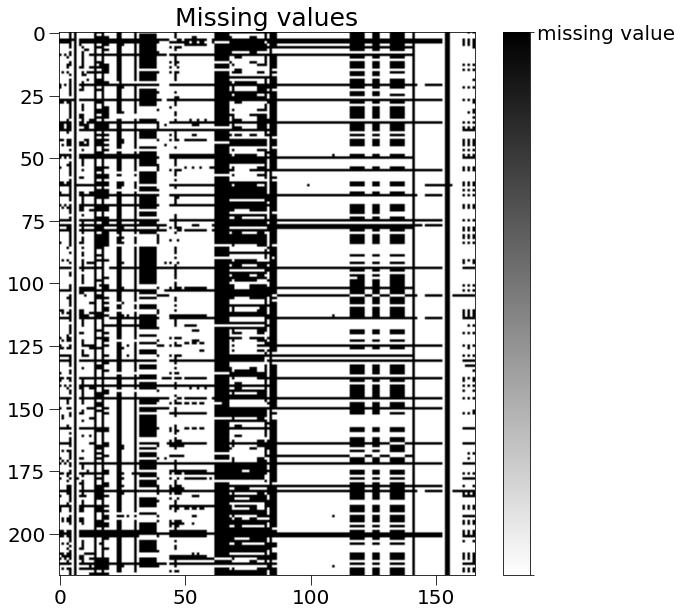

In [106]:
fig,ax=plt.subplots(figsize=(10,10))
im=ax.imshow(pivoted_df.isna(), cmap='binary')
cbar=fig.colorbar(im, ticks=[0,1])
cbar.ax.set_yticklabels(['','missing value'],fontsize=20)
ax.tick_params(size=10, labelsize=20)
ax.set_title('Missing values', fontsize=25)

plt.show()

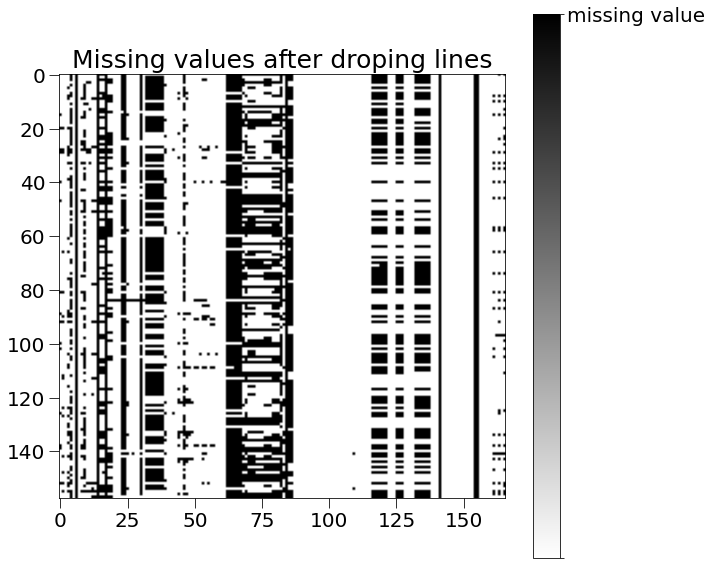

In [107]:
mask=pivoted_df.isna().values.sum(1)>60
cleaned_df=pivoted_df.drop(index=pivoted_df.index[mask])

fig,ax=plt.subplots(figsize=(10,10))
im=ax.imshow(cleaned_df.isna(), cmap='binary')
cbar=fig.colorbar(im, ticks=[0,1])
cbar.ax.set_yticklabels(['','missing value'],fontsize=20)
ax.tick_params(size=10, labelsize=20)

ax.set_title('Missing values after droping lines', fontsize=25)

plt.show()

df=pd.DataFrame(cleaned_df)

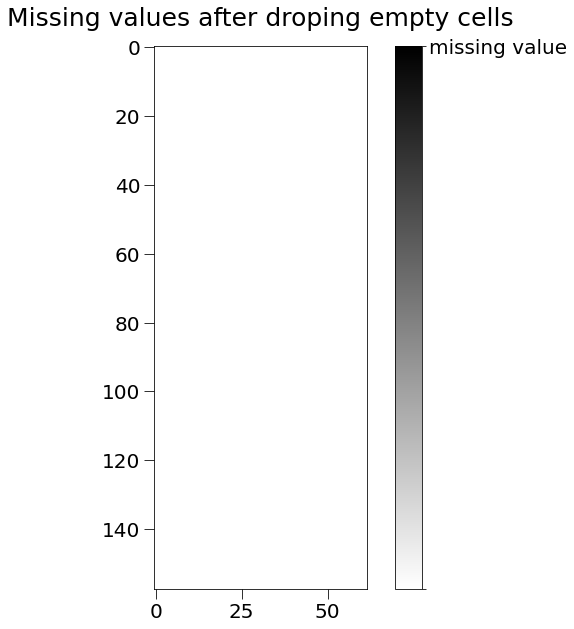

In [108]:
mask=df.isna().values.sum(axis=0)>0 # 0=all the culomns with missing values, 10=maximum 10 values missing

cleaned_df=df.drop(columns=df.columns[mask])

fig,ax=plt.subplots(figsize=(10,10))
im=ax.imshow(cleaned_df.isna(), cmap='binary', vmin=0, vmax=1)
cbar=fig.colorbar(im, ticks=[0,1])
cbar.ax.set_yticklabels(['','missing value'],fontsize=20)
ax.tick_params(size=10, labelsize=20)

ax.set_title('Missing values after droping empty cells', fontsize=25, pad=20)

plt.show()

df=pd.DataFrame(cleaned_df)

In [109]:
display(df.head())
display(df.tail())

Series Code,BX.KLT.DINV.WD.GD.ZS,EG.ELC.ACCS.ZS,EN.POP.DNST,IT.CEL.SETS.P2,IT.MLT.MAIN.P2,IT.NET.USER.ZS,NY.GDP.MKTP.KD.ZG,SL.AGR.EMPL.FE.ZS,SL.AGR.EMPL.MA.ZS,SL.AGR.EMPL.ZS,...,SP.POP.1564.TO.ZS,SP.POP.65UP.TO,SP.POP.65UP.TO.ZS,SP.POP.DPND,SP.POP.GROW,SP.POP.TOTL,SP.RUR.TOTL,SP.RUR.TOTL.ZS,SP.URB.TOTL,SP.URB.TOTL.IN.ZS
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.480710,84.137138,53.083405,62.335417,0.329501,10.595726,2.366712,72.621002,59.122002,61.348999,...,53.598917,880803.0,2.541558,86.570932,2.689163,34656032.0,25985093.0,74.980,8670939.0,25.020
Albania,8.786734,100.000000,104.967190,115.152265,8.496597,66.363445,3.352159,47.271999,35.806000,40.659000,...,69.443689,369116.0,12.833914,44.001540,-0.159880,2876101.0,1195854.0,41.579,1680247.0,58.421
Algeria,1.029475,99.439568,17.048895,115.848054,8.384733,42.945527,3.300000,9.636000,13.355000,12.735000,...,64.973928,2444823.0,6.020834,53.907887,1.825463,40606052.0,11589373.0,28.541,29016679.0,71.459
Argentina,0.587564,100.000000,16.022067,145.330506,22.666391,70.968981,-1.822542,0.172000,0.808000,0.552000,...,63.880519,4849887.0,11.060824,56.542246,0.984742,43847430.0,3671345.0,8.373,40176085.0,91.627
Armenia,3.206058,100.000000,102.733263,117.428481,18.176323,64.346030,0.200000,38.342999,30.448999,34.050999,...,69.015521,323610.0,11.064286,44.894943,0.269302,2924816.0,1079784.0,36.918,1845032.0,63.082


Series Code,BX.KLT.DINV.WD.GD.ZS,EG.ELC.ACCS.ZS,EN.POP.DNST,IT.CEL.SETS.P2,IT.MLT.MAIN.P2,IT.NET.USER.ZS,NY.GDP.MKTP.KD.ZG,SL.AGR.EMPL.FE.ZS,SL.AGR.EMPL.MA.ZS,SL.AGR.EMPL.ZS,...,SP.POP.1564.TO.ZS,SP.POP.65UP.TO,SP.POP.65UP.TO.ZS,SP.POP.DPND,SP.POP.GROW,SP.POP.TOTL,SP.RUR.TOTL,SP.RUR.TOTL.ZS,SP.URB.TOTL,SP.URB.TOTL.IN.ZS
Country Name,,,,,,,,,,,,,,,,,,,,,
Vietnam,6.138072,100.000000,304.992653,127.526085,5.919501,46.500000,6.210812,43.486000,40.360001,41.865002,...,69.999138,6547956.0,6.923993,42.858903,1.060392,94569072.0,61933285.0,65.490,32635787.0,34.510
West Bank and Gaza,2.208254,100.000000,756.074086,77.508216,9.017462,61.178385,4.708435,12.587000,7.250000,8.318000,...,57.160856,137024.0,3.010475,74.944902,2.884693,4551566.0,1109308.0,24.372,3442258.0,75.628
"Yemen, Rep.",-3.080162,71.642349,52.245796,59.574130,4.226432,24.579208,-34.339754,57.243000,34.388000,35.962002,...,56.850427,797863.0,2.892462,75.900173,2.451502,27584213.0,17821057.0,64.606,9763156.0,35.394
Zambia,3.163072,27.219337,22.318554,72.429338,0.611203,25.506579,3.757178,62.865002,44.696999,53.320999,...,52.416488,413421.0,2.491780,90.779663,3.002816,16591390.0,9550336.0,57.562,7041054.0,42.438
Zimbabwe,2.063867,38.145138,41.748383,79.743884,1.892961,23.119989,0.615714,71.771004,63.117001,67.430000,...,55.805034,454722.0,2.815553,79.195304,2.336070,16150362.0,10934441.0,67.704,5215921.0,32.296


In [110]:
print('The table consists of %d countries and %d features.'%(len(df.index),len(df.columns)))

The table consists of 158 countries and 62 features.


In [111]:
des=pd.read_csv(url, sep='\t', header=0, na_values=['..', '...']) [['Series Code','Series Name']]

In [112]:
des=des[des['Series Code'].isin(list(df.columns.values))].drop_duplicates()

In [113]:
for i in des.values:
    print(i[0],'---->',i[1])
    print('')

EG.ELC.ACCS.ZS ----> Access to electricity (% of population)

SP.ADO.TFRT ----> Adolescent fertility rate (births per 1,000 women ages 15-19)

SP.POP.DPND ----> Age dependency ratio (% of working-age population)

SL.FAM.WORK.FE.ZS ----> Contributing family workers, female (% of female employment) (modeled ILO estimate)

SL.FAM.WORK.MA.ZS ----> Contributing family workers, male (% of male employment) (modeled ILO estimate)

SL.FAM.WORK.ZS ----> Contributing family workers, total (% of total employment) (modeled ILO estimate)

SL.EMP.MPYR.FE.ZS ----> Employers, female (% of female employment) (modeled ILO estimate)

SL.EMP.MPYR.MA.ZS ----> Employers, male (% of male employment) (modeled ILO estimate)

SL.EMP.MPYR.ZS ----> Employers, total (% of total employment) (modeled ILO estimate)

SL.AGR.EMPL.ZS ----> Employment in agriculture (% of total employment) (modeled ILO estimate)

SL.AGR.EMPL.FE.ZS ----> Employment in agriculture, female (% of female employment) (modeled ILO estimate)

SL.

In [114]:
tmp=0
r=''
s='Hungary'
for i in df.index:
    if i!=s and np.sum((((df.loc[s]-df.loc[i]).values)**2/df.loc[s].values)<.01)>tmp:
        r=i
        tmp=np.sum((((df.loc[s]-df.loc[i]).values)**2/df.loc[s].values)<.01)
print(r)

Germany


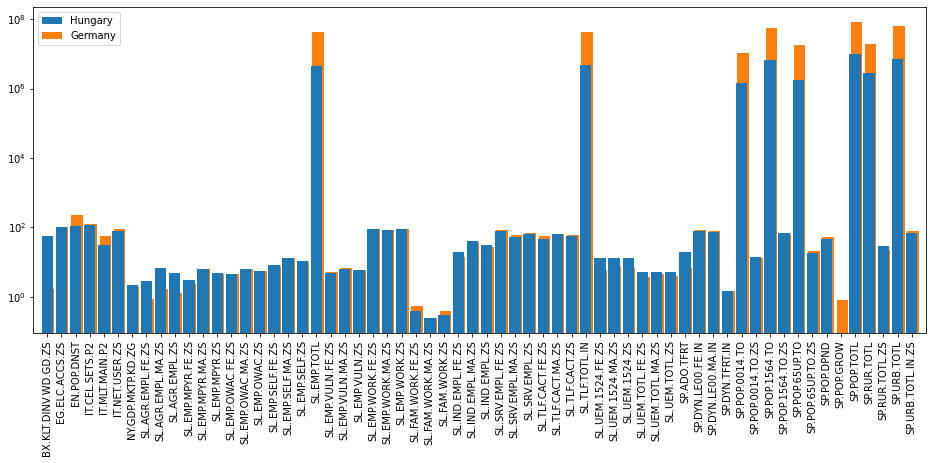

In [115]:
fig,ax=plt.subplots(1,1, figsize=(16,6))

s='Hungary'
x_label=df.loc[s].index
y=df.loc[s].values
ax.bar(range(len(y)),y, label=s, zorder=3)

s='Germany'
x_label=df.loc[s].index
y=df.loc[s].values
ax.bar(np.array(range(len(y)))+0.1,y, label=s)

ax.set_xticks(range(len(y)))
ax.set_xticklabels(x_label,rotation=90)
ax.set_xlim(-1,len(y))
ax.set_yscale('log')

ax.legend()
plt.show()

In [116]:
tmp=0
r=''
s='Greece'
for i in df.index:
    if i!=s and np.sum((np.abs((df.loc[s]-df.loc[i]).values)/df.loc[s].values)<.1)>tmp:
        r=i
        tmp=np.sum((np.abs((df.loc[s]-df.loc[i]).values)/df.loc[s].values)<.1)
print(r)

Serbia


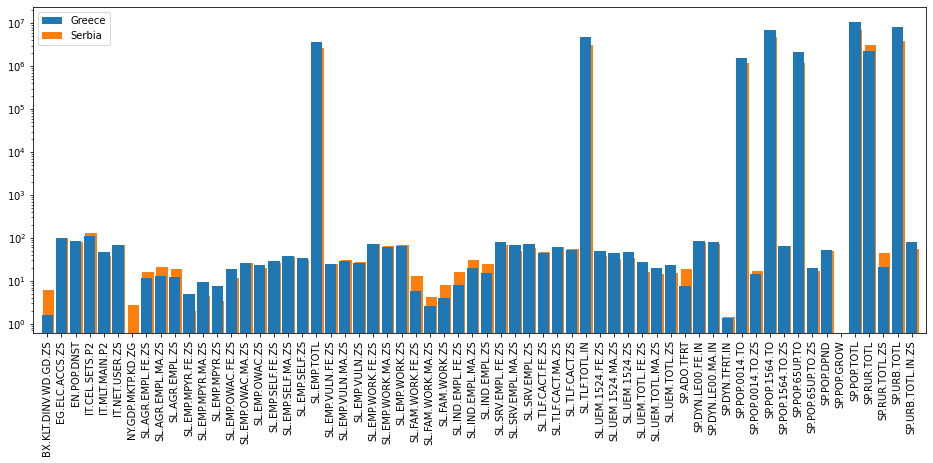

In [117]:
fig,ax=plt.subplots(1,1, figsize=(16,6))

s='Greece'
x_label=df.loc[s].index
y=df.loc[s].values
ax.bar(range(len(y)),y, label=s, zorder=3)

s='Serbia'
x_label=df.loc[s].index
y=df.loc[s].values
ax.bar(np.array(range(len(y)))+0.1,y, label=s)

ax.set_xticks(range(len(y)))
ax.set_xticklabels(x_label,rotation=90)
ax.set_xlim(-1,len(y))
ax.set_yscale('log')

ax.legend()
plt.show()

### Taks 3
-----------
- Perform PCA with 3 principal components on the filtered, imputed data (from now on, data refers to the filtered, imputed dataset)
- Plot the three embedded 2D combination next to each other (0 vs 1, 0 vs 2 and 1 vs 2)
- It seems that the embedding is really dominated by a single direction. Normalize the data (each feature should have zero mean and unit variance after normalization) and re-do the PCA and the plotting (do not delete the previous plots, just make new ones).
- Give some explaination for the second principal component: Look at the coefficients of the features which were use the calculate that principal component. For the features with the largest coefficient (in absolute value) look up the Series Name for the Code.
-----

In [118]:
from sklearn.decomposition import PCA

In [119]:
pca=PCA(3)
fitted_pca=pca.fit_transform(df)#fit the model

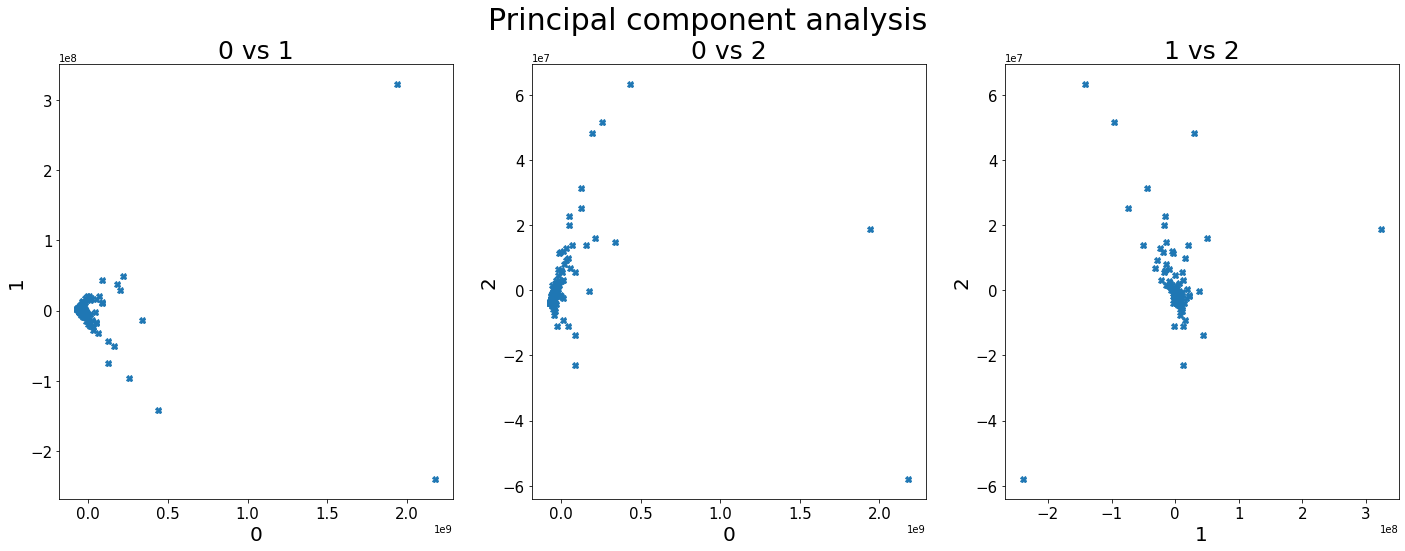

In [120]:
fig,ax=plt.subplots(1,3, figsize=(24,8))
fig.suptitle('Principal component analysis', fontsize=30)

ax[0].plot(fitted_pca[:,0],fitted_pca[:,1], 'X')
ax[0].tick_params(labelsize=15)
ax[0].set_xlabel('0', fontsize=20)
ax[0].set_ylabel('1', fontsize=20)
ax[0].set_title('0 vs 1', fontsize=25)

ax[1].plot(fitted_pca[:,0],fitted_pca[:,2], 'X')
ax[1].tick_params(labelsize=15)
ax[1].set_xlabel('0', fontsize=20)
ax[1].set_ylabel('2', fontsize=20)
ax[1].set_title('0 vs 2', fontsize=25)

ax[2].plot(fitted_pca[:,1],fitted_pca[:,2], 'X')
ax[2].tick_params(labelsize=15)
ax[2].set_xlabel('1', fontsize=20)
ax[2].set_ylabel('2', fontsize=20)
ax[2].set_title('1 vs 2', fontsize=25)

plt.show()

In [121]:
display(df)
norm=(df-df.mean())/df.std() #normalize the dataset
display(norm)

Series Code,BX.KLT.DINV.WD.GD.ZS,EG.ELC.ACCS.ZS,EN.POP.DNST,IT.CEL.SETS.P2,IT.MLT.MAIN.P2,IT.NET.USER.ZS,NY.GDP.MKTP.KD.ZG,SL.AGR.EMPL.FE.ZS,SL.AGR.EMPL.MA.ZS,SL.AGR.EMPL.ZS,...,SP.POP.1564.TO.ZS,SP.POP.65UP.TO,SP.POP.65UP.TO.ZS,SP.POP.DPND,SP.POP.GROW,SP.POP.TOTL,SP.RUR.TOTL,SP.RUR.TOTL.ZS,SP.URB.TOTL,SP.URB.TOTL.IN.ZS
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.480710,84.137138,53.083405,62.335417,0.329501,10.595726,2.366712,72.621002,59.122002,61.348999,...,53.598917,880803.0,2.541558,86.570932,2.689163,34656032.0,25985093.0,74.980,8670939.0,25.020
Albania,8.786734,100.000000,104.967190,115.152265,8.496597,66.363445,3.352159,47.271999,35.806000,40.659000,...,69.443689,369116.0,12.833914,44.001540,-0.159880,2876101.0,1195854.0,41.579,1680247.0,58.421
Algeria,1.029475,99.439568,17.048895,115.848054,8.384733,42.945527,3.300000,9.636000,13.355000,12.735000,...,64.973928,2444823.0,6.020834,53.907887,1.825463,40606052.0,11589373.0,28.541,29016679.0,71.459
Argentina,0.587564,100.000000,16.022067,145.330506,22.666391,70.968981,-1.822542,0.172000,0.808000,0.552000,...,63.880519,4849887.0,11.060824,56.542246,0.984742,43847430.0,3671345.0,8.373,40176085.0,91.627
Armenia,3.206058,100.000000,102.733263,117.428481,18.176323,64.346030,0.200000,38.342999,30.448999,34.050999,...,69.015521,323610.0,11.064286,44.894943,0.269302,2924816.0,1079784.0,36.918,1845032.0,63.082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,6.138072,100.000000,304.992653,127.526085,5.919501,46.500000,6.210812,43.486000,40.360001,41.865002,...,69.999138,6547956.0,6.923993,42.858903,1.060392,94569072.0,61933285.0,65.490,32635787.0,34.510
West Bank and Gaza,2.208254,100.000000,756.074086,77.508216,9.017462,61.178385,4.708435,12.587000,7.250000,8.318000,...,57.160856,137024.0,3.010475,74.944902,2.884693,4551566.0,1109308.0,24.372,3442258.0,75.628
"Yemen, Rep.",-3.080162,71.642349,52.245796,59.574130,4.226432,24.579208,-34.339754,57.243000,34.388000,35.962002,...,56.850427,797863.0,2.892462,75.900173,2.451502,27584213.0,17821057.0,64.606,9763156.0,35.394


Series Code,BX.KLT.DINV.WD.GD.ZS,EG.ELC.ACCS.ZS,EN.POP.DNST,IT.CEL.SETS.P2,IT.MLT.MAIN.P2,IT.NET.USER.ZS,NY.GDP.MKTP.KD.ZG,SL.AGR.EMPL.FE.ZS,SL.AGR.EMPL.MA.ZS,SL.AGR.EMPL.ZS,...,SP.POP.1564.TO.ZS,SP.POP.65UP.TO,SP.POP.65UP.TO.ZS,SP.POP.DPND,SP.POP.GROW,SP.POP.TOTL,SP.RUR.TOTL,SP.RUR.TOTL.ZS,SP.URB.TOTL,SP.URB.TOTL.IN.ZS
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,-0.480276,0.015043,-0.179273,-1.278986,-1.042346,-1.522742,-0.118036,1.700400,1.460688,1.471150,...,-1.540226,-0.220998,-1.020747,1.621242,1.160984,-0.067558,0.061242,1.514654,-0.205714,-1.514654
Albania,0.490474,0.599232,-0.150519,0.080874,-0.527762,0.492355,0.120597,0.797264,0.444383,0.628956,...,0.784789,-0.258587,0.632719,-0.783186,-1.359119,-0.271031,-0.227032,0.049407,-0.296629,-0.049407
Algeria,-0.416140,0.578593,-0.199244,0.098788,-0.534811,-0.353822,0.107967,-0.543636,-0.534219,-0.507701,...,0.128909,-0.106102,-0.461801,-0.223650,0.397004,-0.029462,-0.106166,-0.522549,0.058885,0.522549
Argentina,-0.467788,0.599232,-0.199813,0.857864,0.365034,0.658771,-1.132493,-0.880820,-1.081121,-1.003615,...,-0.031534,0.070578,0.347872,-0.074855,-0.346651,-0.008709,-0.198244,-1.407287,0.204014,1.407287
Armenia,-0.161757,0.599232,-0.151757,0.139479,0.082128,0.419459,-0.642720,0.479140,0.210880,0.359975,...,0.721961,-0.261930,0.348429,-0.732724,-0.979488,-0.270719,-0.228381,-0.155064,-0.294486,0.155064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0.180917,0.599232,-0.039662,0.399459,-0.690137,-0.225386,0.812840,0.662376,0.642884,0.678047,...,0.866294,0.195321,-0.316709,-0.847725,-0.279735,0.316040,0.479283,1.098343,0.105952,-1.098343
West Bank and Gaza,-0.278373,0.599232,0.210333,-0.888337,-0.494944,0.305000,0.449029,-0.438497,-0.800325,-0.687497,...,-1.017557,-0.275637,-0.945415,0.964574,1.333938,-0.260304,-0.228038,-0.705436,-0.273714,0.705436
"Yemen, Rep.",-0.896446,-0.445108,-0.179737,-1.350080,-0.796813,-1.017466,-9.006764,1.152511,0.382574,0.437763,...,-1.063109,-0.227091,-0.964374,1.018530,0.950762,-0.112835,-0.033697,1.059564,-0.191510,-1.059564


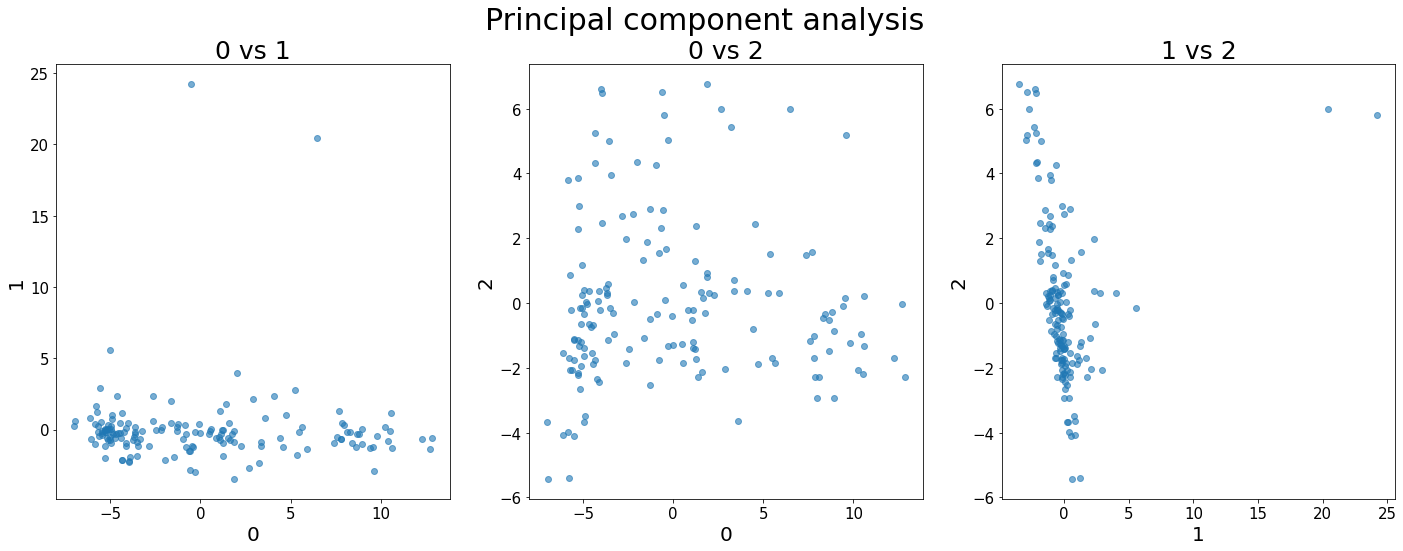

In [122]:
pca=PCA(3)
fitted_pca=pca.fit_transform(norm)#fit the model

fig,ax=plt.subplots(1,3, figsize=(24,8))
fig.suptitle('Principal component analysis', fontsize=30)

ax[0].plot(fitted_pca[:,0],fitted_pca[:,1], 'o', alpha=0.6)
ax[0].tick_params(labelsize=15)
ax[0].set_xlabel('0', fontsize=20)
ax[0].set_ylabel('1', fontsize=20)
ax[0].set_title('0 vs 1', fontsize=25)

ax[1].plot(fitted_pca[:,0],fitted_pca[:,2], 'o', alpha=0.6)
ax[1].tick_params(labelsize=15)
ax[1].set_xlabel('0', fontsize=20)
ax[1].set_ylabel('2', fontsize=20)
ax[1].set_title('0 vs 2', fontsize=25)

ax[2].plot(fitted_pca[:,1],fitted_pca[:,2], 'o', alpha=0.6)
ax[2].tick_params(labelsize=15)
ax[2].set_xlabel('1', fontsize=20)
ax[2].set_ylabel('2', fontsize=20)
ax[2].set_title('1 vs 2', fontsize=25)

plt.show()

In [126]:
comp=pca.components_

In [140]:
print('Second pricipal component: \n')
for i in range(comp.shape[1]):
    print(np.round(comp[1][i],3), '--', des.loc[des.index[des['Series Code'].values==norm.columns.values[i]]].values[0][1])

Second pricipal component: 

-0.018 -- Foreign direct investment, net inflows (% of GDP)
0.05 -- Access to electricity (% of population)
0.013 -- Population density (people per sq. km of land area)
0.016 -- Mobile cellular subscriptions (per 100 people)
0.013 -- Telephone lines (per 100 people)
0.017 -- Individuals using the Internet (% of population)
0.061 -- GDP growth (annual %)
-0.006 -- Employment in agriculture, female (% of female employment) (modeled ILO estimate)
-0.021 -- Employment in agriculture, male (% of male employment) (modeled ILO estimate)
-0.017 -- Employment in agriculture (% of total employment) (modeled ILO estimate)
-0.047 -- Employers, female (% of female employment) (modeled ILO estimate)
-0.033 -- Employers, male (% of male employment) (modeled ILO estimate)
-0.039 -- Employers, total (% of total employment) (modeled ILO estimate)
0.002 -- Own-account workers, female (% of female employment) (modeled ILO estimate)
0.017 -- Own-account workers, male (% of male

In [153]:
des.loc[des.index[des['Series Code'].values==norm.columns.values[np.abs(comp[1]).argsort()][::-1][0]]].values[0][1] 

'Population ages 15-64, total'

### Task 4
-----
- Perform T-SNE on the scaled data with 2 components
- Plot the embeddings results. Add a text label for each point to make it possible to interpret the results. It will not be possible to read all, but try to make it useful, see the attached image as an example!
- Highlight Hungary, Greece, Norway, China, Russia (HUN, GRC, NOR, CHN, RUS)! Which countries are the closest one to Hungary and Greece?
-------

In [30]:
from sklearn.manifold import TSNE

In [31]:
tsne = TSNE(2)
fitted_tsne=tsne.fit_transform(norm)

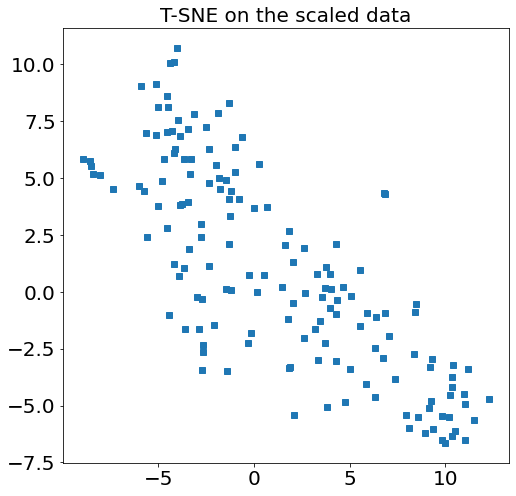

In [32]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.plot(fitted_tsne.T[0], fitted_tsne.T[1], 's')
ax.tick_params(labelsize=20)
ax.set_title('T-SNE on the scaled data', fontsize=20)
plt.show()

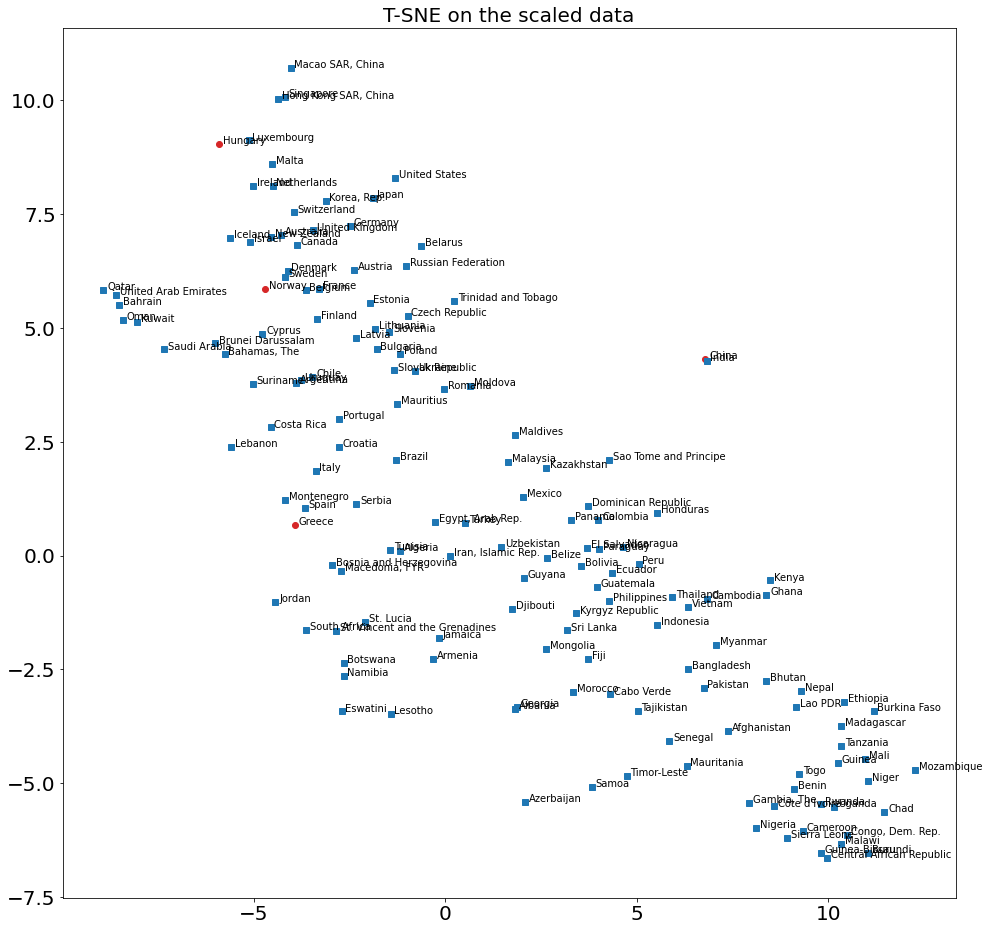

In [33]:
fig,ax=plt.subplots(1,1,figsize=(16,16))

for i in range(len(fitted_tsne)):
    if norm.index.values[i] in ['Hungary', 'Greece', 'Norway', 'China', 'Russia']:
        ax.plot(fitted_tsne[i][0], fitted_tsne[i][1], 'o', color='tab:red')
        ax.text(fitted_tsne[i][0]+0.1, fitted_tsne[i][1], norm.index.values[i])
    else:
        ax.plot(fitted_tsne[i][0], fitted_tsne[i][1], 's', color='tab:blue')
        ax.text(fitted_tsne[i][0]+0.1, fitted_tsne[i][1], norm.index.values[i])
        
    
    
ax.tick_params(labelsize=20)
ax.set_title('T-SNE on the scaled data', fontsize=20)
plt.show()

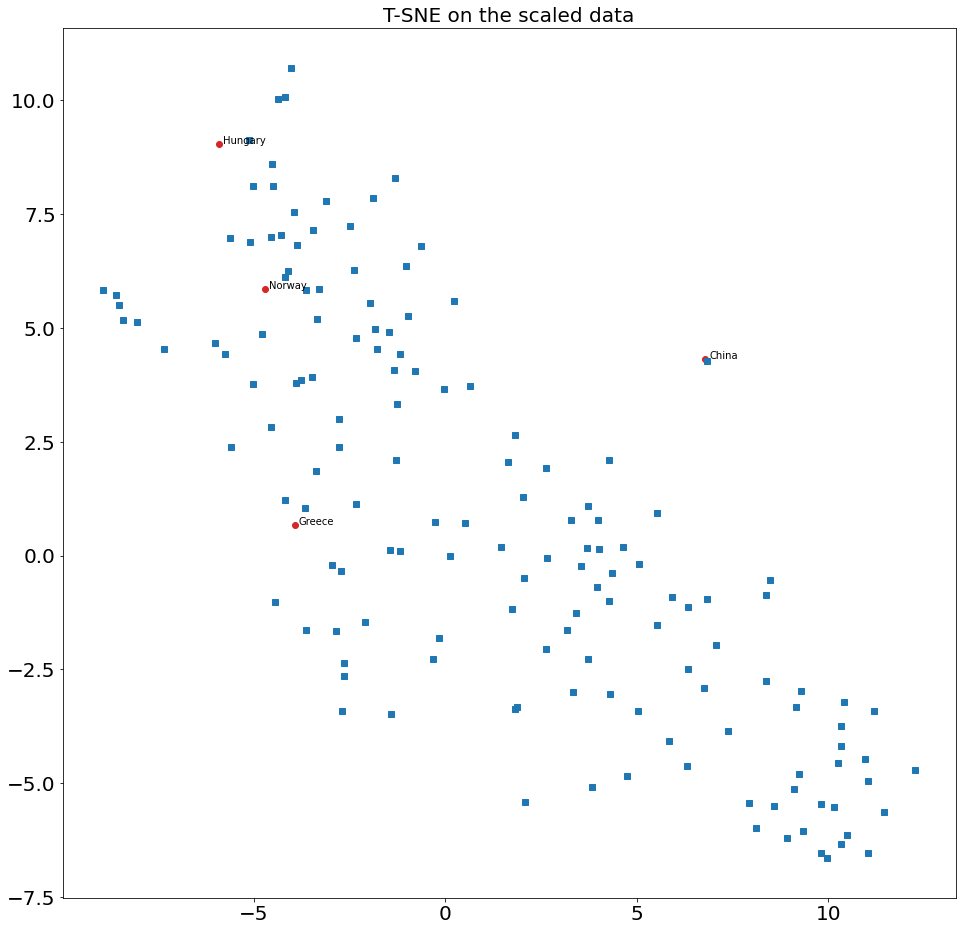

In [34]:
fig,ax=plt.subplots(1,1,figsize=(16,16))

for i in range(len(fitted_tsne)):
    if norm.index.values[i] in ['Hungary', 'Greece', 'Norway', 'China', 'Russia']:
        ax.plot(fitted_tsne[i][0], fitted_tsne[i][1], 'o', color='tab:red')
        ax.text(fitted_tsne[i][0]+0.1, fitted_tsne[i][1], norm.index.values[i])
    else:
        ax.plot(fitted_tsne[i][0], fitted_tsne[i][1], 's', color='tab:blue')

        
    
    
ax.tick_params(labelsize=20)
ax.set_title('T-SNE on the scaled data', fontsize=20)
plt.show()

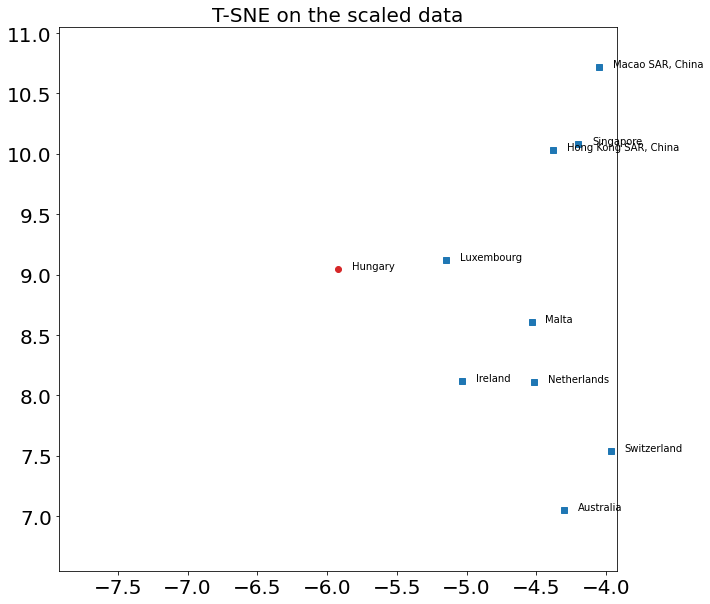

In [35]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
mask=norm.index.values=='Hungary'
x,y=fitted_tsne[:,0][mask],fitted_tsne[:,1][mask]
e=2

for i in range(len(fitted_tsne)):
    if (fitted_tsne[i][0] < x+e and fitted_tsne[i][0] > x-e) and (fitted_tsne[i][1] < y+e and fitted_tsne[i][1] > y-e):
        if norm.index.values[i] in ['Hungary', 'Greece', 'Norway', 'China', 'Russia']:
            ax.plot(fitted_tsne[i][0], fitted_tsne[i][1], 'o', color='tab:red')
            ax.text(fitted_tsne[i][0]+0.1, fitted_tsne[i][1], norm.index.values[i])
        else:
            ax.plot(fitted_tsne[i][0], fitted_tsne[i][1], 's', color='tab:blue')
            ax.text(fitted_tsne[i][0]+0.1, fitted_tsne[i][1], norm.index.values[i])
        


ax.set_xlim(x-e,x+e)
ax.set_ylim(y-e-0.5,y+e)
ax.tick_params(labelsize=20)

ax.set_title('T-SNE on the scaled data', fontsize=20)
plt.show()

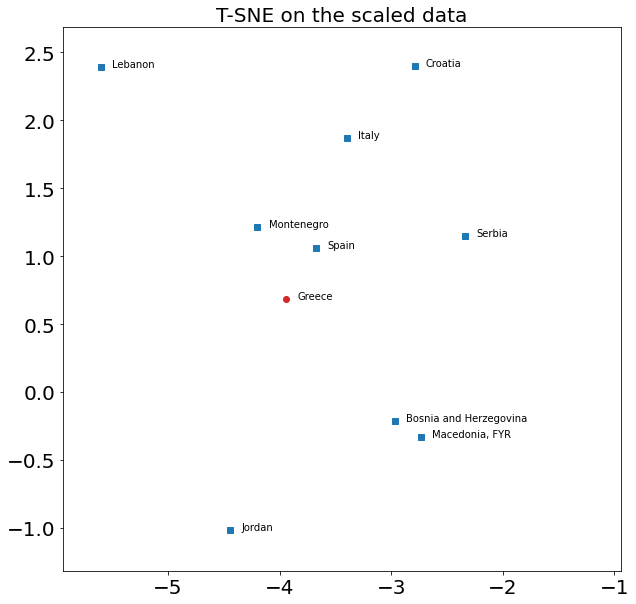

In [36]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
mask=norm.index.values=='Greece'
x,y=fitted_tsne[:,0][mask],fitted_tsne[:,1][mask]
e=2

for i in range(len(fitted_tsne)):
    if (fitted_tsne[i][0] < x+e and fitted_tsne[i][0] > x-e) and (fitted_tsne[i][1] < y+e and fitted_tsne[i][1] > y-e):
        if norm.index.values[i] in ['Hungary', 'Greece', 'Norway', 'China', 'Russia']:
            ax.plot(fitted_tsne[i][0], fitted_tsne[i][1], 'o', color='tab:red')
            ax.text(fitted_tsne[i][0]+0.1, fitted_tsne[i][1], norm.index.values[i])
        else:
            ax.plot(fitted_tsne[i][0], fitted_tsne[i][1], 's', color='tab:blue')
            ax.text(fitted_tsne[i][0]+0.1, fitted_tsne[i][1], norm.index.values[i])
        


ax.set_xlim(x-e,x+e+1)
ax.set_ylim(y-e,y+e)
ax.tick_params(labelsize=20)

ax.set_title('T-SNE on the scaled data', fontsize=20)
plt.show()

### Task 5
------
- Perform hierarchical clustering on the filtered and scaled data (hint: use seaborn)
- Try to plot in a way that all country's name is visible
- Perform K-Means clustering on the filtered and scaled data with 4 clusters.
- Make a plot with text label for each point as in the previous excersice but use different color for every cluster.
- Write down your impressions that you got from these two plots! Which cluster are China and Hungary in?
----

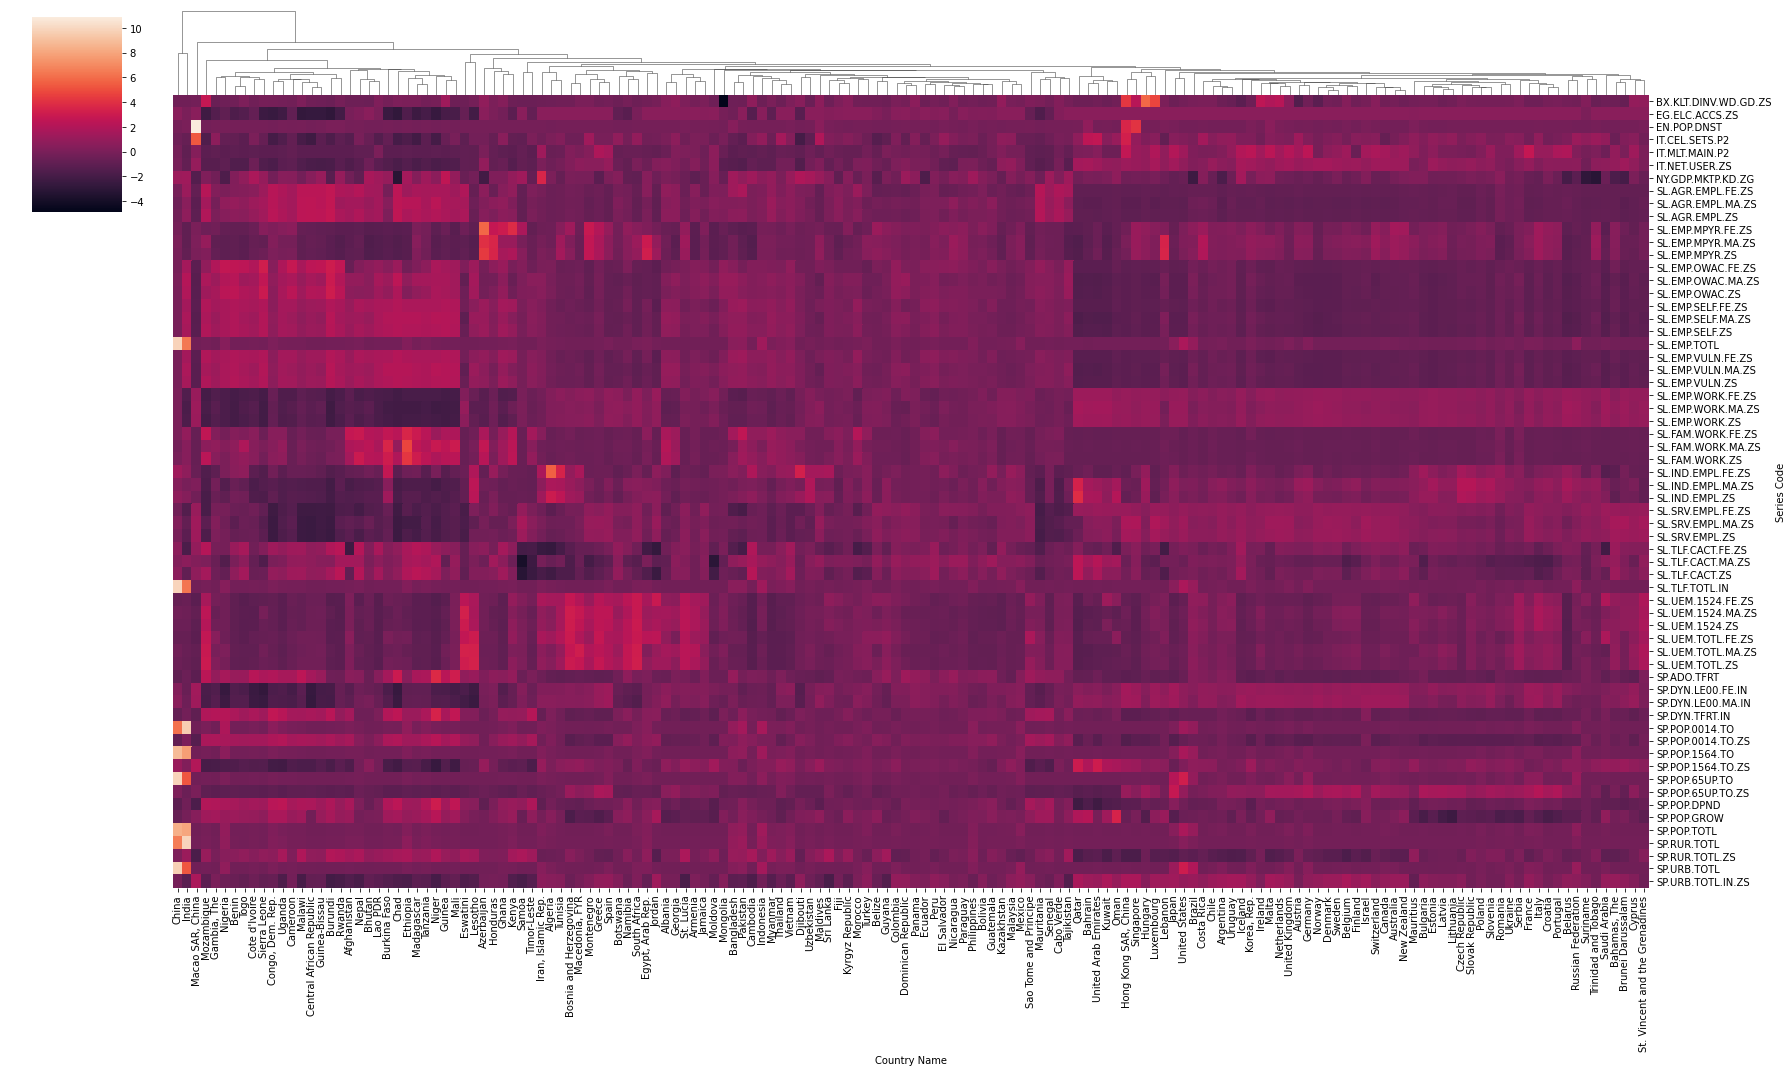

In [37]:
_=sns.clustermap(norm.T,row_cluster=False,col_cluster=True, figsize=(25,15),dendrogram_ratio=0.1, xticklabels=norm.index.values)

In [38]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import matplotlib.cm as cm
from matplotlib.colors import Normalize
NORM=Normalize(0,3)

kmeans=KMeans(4)
y=kmeans.fit_transform(norm)


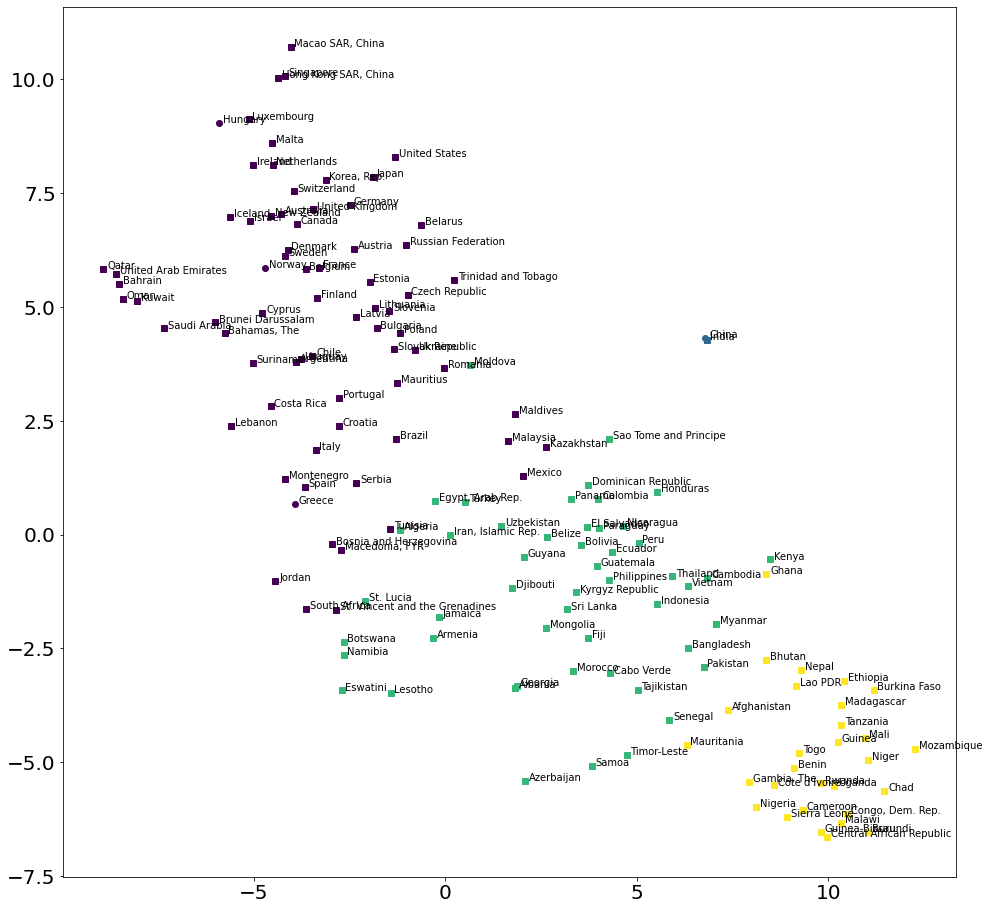

In [39]:
fig,ax=plt.subplots(1,1,figsize=(16,16))

for i in range(len(fitted_tsne)):
    if norm.index.values[i] in ['Hungary', 'Greece', 'Norway', 'China', 'Russia']:
        ax.plot(fitted_tsne[i][0], fitted_tsne[i][1], 'o', color=cm.viridis(NORM(kmeans.labels_[i])))
        ax.text(fitted_tsne[i][0]+0.1, fitted_tsne[i][1], norm.index.values[i])
    else:
        ax.plot(fitted_tsne[i][0], fitted_tsne[i][1], 's', color=cm.viridis(NORM(kmeans.labels_[i])))
        ax.text(fitted_tsne[i][0]+0.1, fitted_tsne[i][1], norm.index.values[i])
        
    
    
ax.tick_params(labelsize=20)
plt.show()

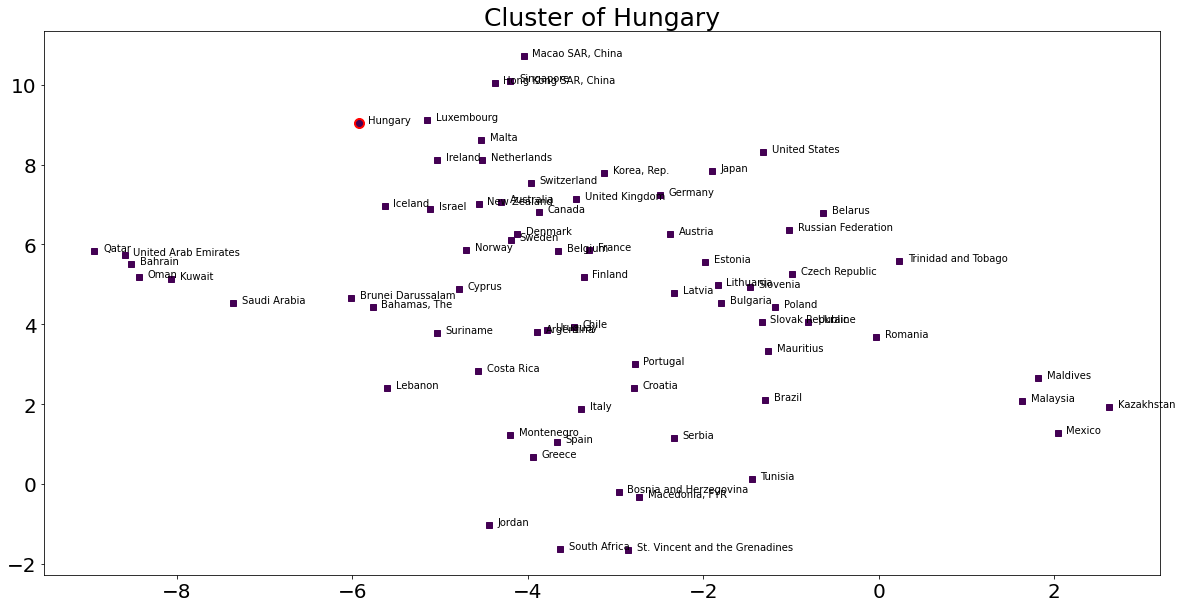

In [40]:
fig,ax=plt.subplots(1,1,figsize=(20,10))
mask=norm.index.values=='Hungary'
x,y=fitted_tsne[:,0][mask],fitted_tsne[:,1][mask]

for i in range(len(fitted_tsne)):
    if kmeans.labels_[i]==kmeans.labels_[np.where(norm.index.values=='Hungary')][0]:
        if norm.index.values[i] in ['Hungary']:
            ax.plot(fitted_tsne[i][0], fitted_tsne[i][1], 'o', color='red',ms=10)
            ax.plot(fitted_tsne[i][0], fitted_tsne[i][1], 'o', color=cm.viridis(NORM(kmeans.labels_[i])))
            ax.text(fitted_tsne[i][0]+0.1, fitted_tsne[i][1], norm.index.values[i])
        else:
            ax.plot(fitted_tsne[i][0], fitted_tsne[i][1], 's', color=cm.viridis(NORM(kmeans.labels_[i])))
            ax.text(fitted_tsne[i][0]+0.1, fitted_tsne[i][1], norm.index.values[i])
        


ax.tick_params(labelsize=20)
ax.set_title('Cluster of Hungary', fontsize=25)
plt.show()

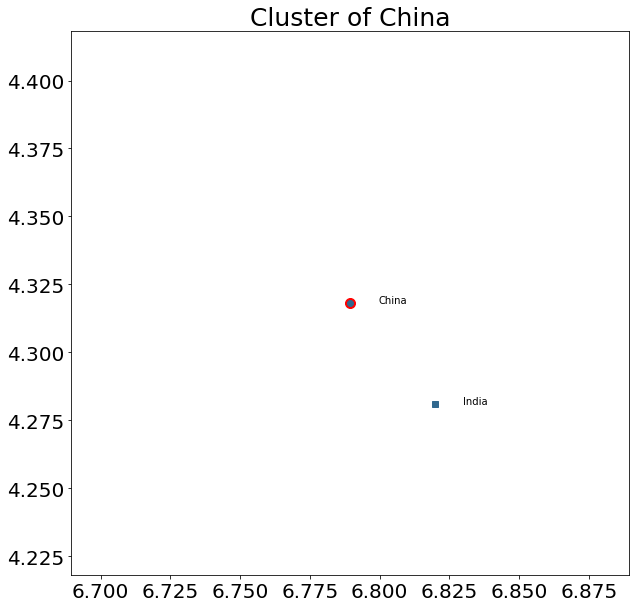

In [41]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
mask=norm.index.values=='China'
x,y=fitted_tsne[:,0][mask],fitted_tsne[:,1][mask]
e=2

for i in range(len(fitted_tsne)):
    if kmeans.labels_[i]==kmeans.labels_[np.where(norm.index.values=='China')][0]:
        if norm.index.values[i] in ['China']:
            ax.plot(fitted_tsne[i][0], fitted_tsne[i][1], 'o', color='red',ms=10)
            ax.plot(fitted_tsne[i][0], fitted_tsne[i][1], 'o', color=cm.viridis(NORM(kmeans.labels_[i])))
            ax.text(fitted_tsne[i][0]+0.01, fitted_tsne[i][1], norm.index.values[i])
        else:
            ax.plot(fitted_tsne[i][0], fitted_tsne[i][1], 's', color=cm.viridis(NORM(kmeans.labels_[i])))
            ax.text(fitted_tsne[i][0]+0.01, fitted_tsne[i][1], norm.index.values[i])
        


ax.tick_params(labelsize=20)
ax.set_xlim(x-.1, x+.1)
ax.set_ylim(y-0.1,y+0.1)
ax.set_title('Cluster of China', fontsize=25)
plt.show()

<font size=4>
Based on the above plots, it is obvious that the countries with similar properties have been included in the same cluster. The best example of this is China. The size and population of that country deviate so much from the average, that only India is in the same cluster as China. The cluster that contains Hungary is much larger. That consists of countries with economies and populations more or less similar to the properties of Hungary.
<font>